<a href="https://colab.research.google.com/github/dpnolan/AI/blob/master/Chollet_2e_4_2_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

tf.__version__

'2.4.1'

In [2]:
#4.11 Load Reuters dataset
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
len(train_data)


8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
#4.12 Decoding newswires back to text
word_index=reuters.get_word_index()
reverse_word_index=dict( [ (value,key) for (key, value) in word_index.items() ] )
decoded_newswire = ' '.join( [reverse_word_index.get(i-3, '?') for i in train_data[0] ] )

In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
#labels are integers between 0 and 45, topic indices for these news stories
train_labels[10]

3

In [9]:
#4.13 Encoding the input data
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1.
  return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [10]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [11]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [12]:
x_train.shape

(8982, 10000)

In [13]:
x_test.shape

(2246, 10000)

In [13]:
#4.14 Encoding the labels
def to_one_hot(labels, dimension=46):
  results=np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1. 
  return results

one_hot_train_labels= to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [15]:
# Alternative to 4.14
from tensorflow.keras.utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)


In [16]:
#4.15 Model definition
model = keras.Sequential([
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(46, activation='softmax')
])

In [17]:
#4.16 Compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [14]:
#4.17 validation set
x_val= x_train[:1000]

partial_x_train=x_train[1000:]

y_val = one_hot_train_labels[:1000]

partial_y_train = one_hot_train_labels[1000:]

In [19]:
#4.18 training the model
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 2s 84ms/step - loss: 3.1360 - accuracy: 0.3972 - val_loss: 1.7704 - val_accuracy: 0.6440
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.5452 - accuracy: 0.6873 - val_loss: 1.2941 - val_accuracy: 0.7290
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0941 - accuracy: 0.7630 - val_loss: 1.1161 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8453 - accuracy: 0.8212 - val_loss: 1.0187 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6820 - accuracy: 0.8583 - val_loss: 1.0028 - val_accuracy: 0.7780
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5367 - accuracy: 0.8911 - val_loss: 0.9275 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4237 - accuracy: 0.9160 - val_loss: 0.8870 - val_accuracy: 0.8130
Epoch 8/20
16

<function matplotlib.pyplot.show>

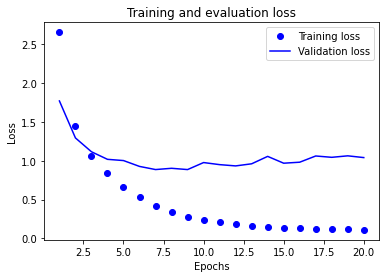

In [20]:
#4.19 Plotting the training and validation loss
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and evaluation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

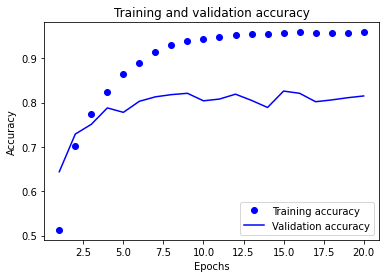

In [21]:
#4.20 Plot accuracy 
plt.clf()
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
model=keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(46,activation='softmax')
    ])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 58ms/step - loss: 3.3289 - accuracy: 0.3553 - val_loss: 1.9458 - val_accuracy: 0.6580
Epoch 2/9
16/16 [==============================] - 1s 46ms/step - loss: 1.6429 - accuracy: 0.6944 - val_loss: 1.3670 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 1s 45ms/step - loss: 1.1359 - accuracy: 0.7591 - val_loss: 1.1493 - val_accuracy: 0.7420
Epoch 4/9
16/16 [==============================] - 1s 45ms/step - loss: 0.8731 - accuracy: 0.8108 - val_loss: 1.0426 - val_accuracy: 0.7830
Epoch 5/9
16/16 [==============================] - 1s 45ms/step - loss: 0.6881 - accuracy: 0.8575 - val_loss: 0.9836 - val_accuracy: 0.7940
Epoch 6/9
16/16 [==============================] - 1s 45ms/step - loss: 0.5480 - accuracy: 0.8928 - val_loss: 0.9390 - val_accuracy: 0.8090
Epoch 7/9
16/16 [==============================] - 1s 46ms/step - loss: 0.4423 - accuracy: 0.9087 - val_loss: 0.9691 - val_accuracy: 0.7990
Epoch 8/9
16/16 [===

In [24]:
results

[0.987183153629303, 0.7818343639373779]

In [25]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array=np.array(test_labels) == np. array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1892252894033838

In [26]:
predictions=model.predict(x_test)

In [27]:
predictions[0].shape

(46,)

In [28]:
np.sum(predictions[0])

0.99999994

In [29]:
np.argmax(predictions[0])

3

In [15]:
#4.22 information bottleneck in the model structure
# Validation accuracy falls to 71% from 80% in the full model above
model=keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(46,activation='softmax')
    ])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=128,
                  validation_data=(x_val, y_val)
)

Epoch 1/20
63/63 [==============================] - 2s 25ms/step - loss: 3.1618 - accuracy: 0.2137 - val_loss: 1.9670 - val_accuracy: 0.3720
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 1.7628 - accuracy: 0.6292 - val_loss: 1.4969 - val_accuracy: 0.6850
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 1.3087 - accuracy: 0.7168 - val_loss: 1.3503 - val_accuracy: 0.7010
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 1.1175 - accuracy: 0.7278 - val_loss: 1.2948 - val_accuracy: 0.7000
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 0.9694 - accuracy: 0.7437 - val_loss: 1.3052 - val_accuracy: 0.6920
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 0.8755 - accuracy: 0.7628 - val_loss: 1.2796 - val_accuracy: 0.7060
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 0.8363 - accuracy: 0.7740 - val_loss: 1.3260 - val_accuracy: 0.7030
Epoch 8/20
63